<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2022/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray, rgba2rgb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


(448, 464) uint8


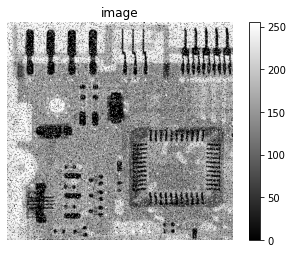

In [2]:
img_url = 'https://raw.githubusercontent.com/hufsaim/T10306201/master/image/circuitboard-saltandpep.tif'
img = rgb2gray(io.imread(img_url))
print(img.shape,img.dtype)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('image')
plt.show()

In [3]:
def MyMedianFilter(I,N):
  y = np.zeros_like(I)
  Nc = int(N/2)
  for i in np.arange(Nc,y.shape[0]-(N-Nc)):
    for j in np.arange(Nc,y.shape[1]-(N-Nc)):
      y[i,j] = np.median(I[i-Nc:i-Nc+N,j-Nc:j-Nc+N])
  return y

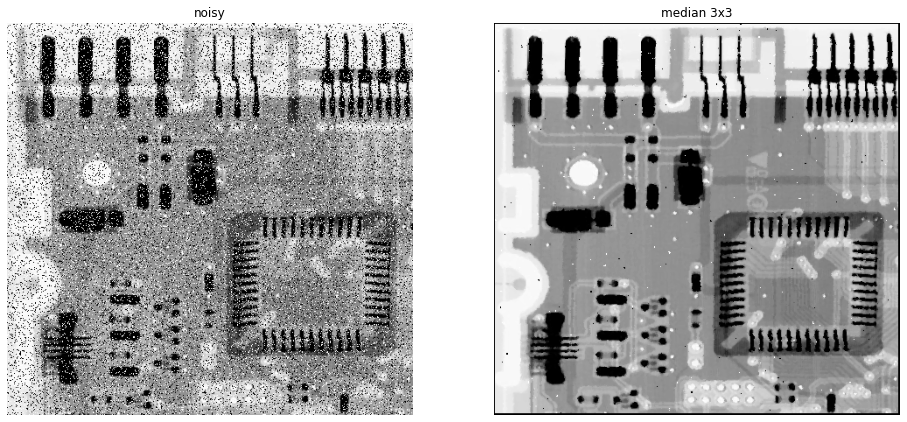

In [4]:
g_median = MyMedianFilter(img,3)

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('noisy')
plt.subplot(122)
plt.imshow(g_median,cmap='gray')
plt.axis('off')
plt.title('median 3x3')
plt.show()

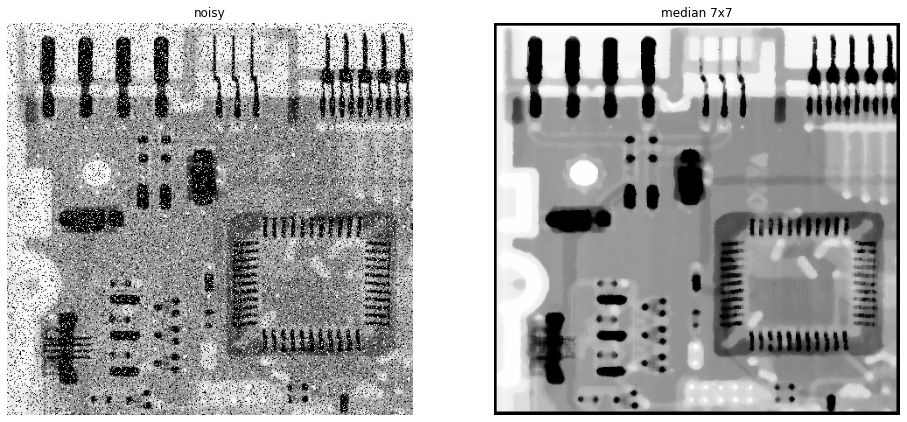

In [5]:
g_median = MyMedianFilter(img,7)

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('noisy')
plt.subplot(122)
plt.imshow(g_median,cmap='gray')
plt.axis('off')
plt.title('median 7x7')
plt.show()

## Adaptive Local Noise Reduction Filter

In [6]:
def MyAdaptiveNR(I,N,N_std):
  y = np.zeros_like(I)
  Nc = int(N/2)
  for i in np.arange(Nc,y.shape[0]-(N-Nc)):
    for j in np.arange(Nc,y.shape[1]-(N-Nc)):
      Sxy = I[i-Nc:i-Nc+N,j-Nc:j-Nc+N]
      N_Sxy = np.std(Sxy)
      if N_std <= N_Sxy:
        y[i,j] = I[i,j] - ((N_std*N_std)/(N_Sxy*N_Sxy))*(I[i,j]-np.mean(Sxy))
      else:
        y[i,j] = np.mean(Sxy)
  return y

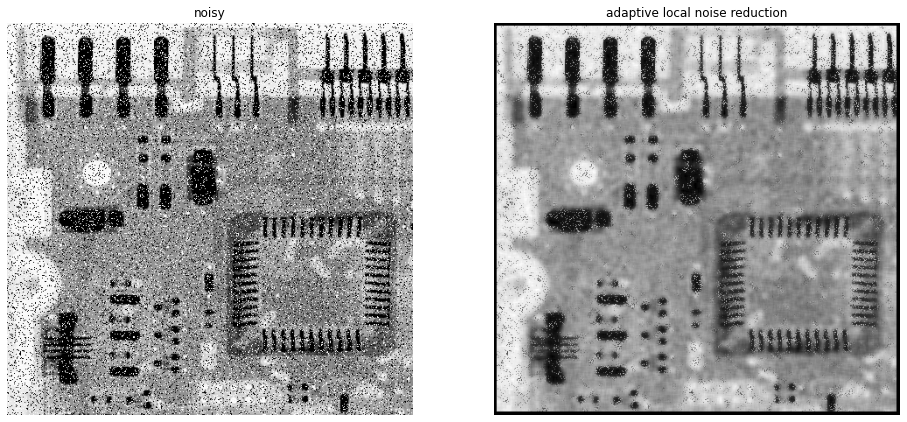

In [10]:
g_aNR = MyAdaptiveNR(img,7,64)

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('noisy')
plt.subplot(122)
plt.imshow(g_aNR,cmap='gray')
plt.axis('off')
plt.title('adaptive local noise reduction')
plt.show()

## Adaptive Median Filter

In [8]:
def MyAdaptiveMedian(I,N_min,N_max):
  y = np.zeros_like(I)
  Nc_max = int(N_max/2)
  for i in np.arange(Nc_max,y.shape[0]-(N_max-Nc_max)):
    for j in np.arange(Nc_max,y.shape[1]-(N_max-Nc_max)):
      flag_go = 1
      N = N_min
      Nc = int(N/2)
      while flag_go:
        Sxy = I[i-Nc:i-Nc+N,j-Nc:j-Nc+N]
        z_min = np.min(Sxy)
        z_max = np.max(Sxy)
        z_med = np.median(Sxy)
        flag_go = 0
        if z_min<z_med<z_max:     # Level A
          if z_min<I[i,j]<z_max:  # Level B
            y[i,j] = I[i,j]
          else:
            y[i,j] = z_med
        else:                     # Level A - else
          N = N + 2
          if N>N_max:
            y[i,j] = z_med
          else:
            flag_go = 1

  return y

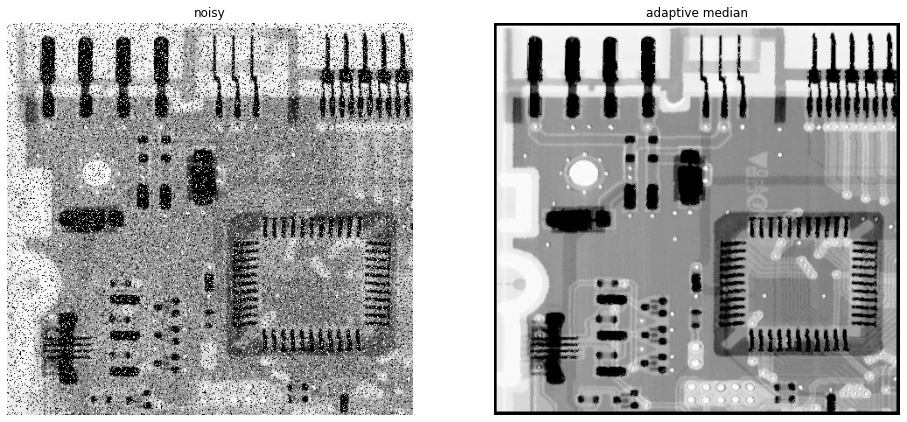

In [9]:
g_aMed = MyAdaptiveMedian(img,3,7)

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('noisy')
plt.subplot(122)
plt.imshow(g_aMed,cmap='gray')
plt.axis('off')
plt.title('adaptive median')
plt.show()